# ChE 297 (Intro to AI and Machine Learning)
## Machine Problem 1

##### Prepared by: Iliad S. Oleriana
##### MS Chemical Engineering

## Predicting CO Emission in a Gas Turbine

##### Data Set Reference: https://archive.ics.uci.edu/dataset/551/gas+turbine+co+and+nox+emission+data+set

In [772]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay

### 1. Transfering Data, loading in Python and Splitting

In [773]:
s1 = pd.read_csv('gt_2011.csv')
s2 = pd.read_csv('gt_2012.csv')
s3 = pd.read_csv('gt_2013.csv')
s4 = pd.read_csv('gt_2014.csv')
s5 = pd.read_csv('gt_2015.csv')

In [774]:
df = pd.concat([s1, s2, s3, s4, s5])
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [775]:
df.shape

(36733, 11)

In [776]:
# x will be a NumPy array containing the first 9 columns of the DataFrame df
# y will be a NumPy array containing the values from the "CO" column of df

x = df.iloc[:,:9].to_numpy()
y = np.array(df["CO"])

In [777]:
x.shape

(36733, 9)

In [778]:
y.shape

(36733,)

In [779]:
# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [780]:
x.shape

(36733, 9)

In [781]:
x_train.shape

(18366, 9)

In [782]:
x_test.shape

(18367, 9)

In [783]:
y_train.shape

(18366,)

In [784]:
y_test.shape

(18367,)

### 2. Normalizing all data using standard scaling

In [785]:
# Normalizing all the data using Standard Scaling

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)


In [786]:
N_train = len(x_train_scaled)

### 3. Training an SVR, MLP Regressor, and Random Forest Regressor

#### 3.1 Support Vector Regressor

In [787]:
# SVR (Support Vector Regressor)
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

#Train the SVR model using the default hyperparameters
svr = SVR()
svr.fit(x_train, y_train)


# Make predictions on the training and testing sets
y_pred_train = svr.predict(x_train)
y_pred_test = svr.predict(x_test)

# Calculate training and testing accuracy (R-squared score), using the'score' method of SVR
train_accuracy = svr.score(x_train, y_train)
test_accuracy = svr.score(x_test, y_test)

# Calculate training and testing mean squared error, using the mean_squared_error from 'sklearn.metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)


In [788]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print(f"Training Mean Squared Error: {train_mse:.2f}")
print(f"Testing Mean Squared Error: {test_mse:.2f}")

Training Accuracy: 0.43
Testing Accuracy: 0.43
Training Mean Squared Error: 2.85
Testing Mean Squared Error: 2.98


#### 3.2 MLP Regressor

In [789]:
# MLP (Multilayer Perceptron)
from sklearn.neural_network import MLPRegressor

# Train the MLP Regressor model
mlp_regressor = MLPRegressor(random_state=0)
mlp_regressor.fit(x_train, y_train)

# Make predictions on the training and testing sets
y_pred_train = mlp_regressor.predict(x_train)
y_pred_test = mlp_regressor.predict(x_test)

# Calculate training and testing accuracy (R-squared score)
train_accuracy = mlp_regressor.score(x_train, y_train)
test_accuracy = mlp_regressor.score(x_test, y_test)

# Calculate training and testing mean squared error
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

In [790]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print(f"Training Mean Squared Error: {train_mse:.2f}")
print(f"Testing Mean Squared Error: {test_mse:.2f}")

Training Accuracy: 0.11
Testing Accuracy: 0.11
Training Mean Squared Error: 4.49
Testing Mean Squared Error: 4.62


#### 3.3 Random Forest Regressor

In [791]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=0)
rf_regressor.fit(x_train, y_train)

# Make predictions
y_pred_train = rf_regressor.predict(x_train)
y_pred_test = rf_regressor.predict(x_test)

# Calculate training and testing accuracy (R-squared score)
train_accuracy = rf_regressor.score(x_train, y_train)
test_accuracy = rf_regressor.score(x_test, y_test)

# Calculate training and testing mean squared error
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

In [792]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print(f"Training Mean Squared Error: {train_mse:.2f}")
print(f"Testing Mean Squared Error: {test_mse:.2f}")

Training Accuracy: 0.96
Testing Accuracy: 0.75
Training Mean Squared Error: 0.18
Testing Mean Squared Error: 1.29


### 4. Hyperparameter tuning for the best model from item 3

In [793]:
# Perform hyperparameter tuning
best_model = None
best_params = None
best_accuracy = float('-inf')

for _ in range(5):
    # Choose hyperparameters to try
    n_estimators = np.random.randint(50, 200)
    max_depth = np.random.randint(5, 20)
    min_samples_split = np.random.randint(2, 10)
    min_samples_leaf = np.random.randint(1, 5)
    
    # Train the model with the selected hyperparameters
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators,
                                         max_depth=max_depth,
                                         min_samples_split=min_samples_split,
                                         min_samples_leaf=min_samples_leaf,
                                         random_state=0)
    rf_regressor.fit(x_train, y_train)
    
    # Evaluate the model
    accuracy = rf_regressor.score(x_test, y_test)
    
    # Keep track of the best model and parameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = rf_regressor
        best_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf
        }

# Print the best model and its parameters
print("Best Model:")
print(best_model)
print("Best Parameters:")
print(best_params)
print(f"Best Testing Accuracy: {best_accuracy:.2f}")

Best Model:
RandomForestRegressor(max_depth=15, min_samples_leaf=4, min_samples_split=9,
                      n_estimators=90, random_state=0)
Best Parameters:
{'n_estimators': 90, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 4}
Best Testing Accuracy: 0.74


## Glass Identification in Forensics

### 1. Transfering Data, loading in Python

In [794]:
df = pd.read_csv('glass.csv')

In [795]:
df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [796]:
df.tail()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [797]:
df.shape

(214, 11)

 ### 2. Splitting the data, and normalizing using standard scaling

In [798]:
# x will be a NumPy array containing the first 9 columns of the DataFrame df
# y will be a NumPy array containing the values from the "Type" column of df

x = df.iloc[:,:9].to_numpy()
y = np.array(df["Type"])

# Note: labelencoder is not used, because the 'Type' column is already 'int' or numerical form and not categorical variables.

In [799]:
y.shape

(214,)

In [800]:
x.shape

(214, 9)

In [801]:
# Splitting the dataset into 70% training and 30% testing with stratification
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y, random_state=0)

In [802]:
x_train.shape

(149, 9)

In [803]:
x_test.shape

(65, 9)

In [804]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

### 3. Training Support Vector Classifier, Random Forest Classifier, and MLP Classifier

#### Support Vector Classifier (SCV)

In [805]:
#Support Vector Classifier (SVC)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Train the SVC
svc = SVC()
svc.fit(x_train, y_train)

# Predict on training and test data
y_train_pred = svc.predict(x_train)
y_test_pred = svc.predict(x_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

In [806]:
# Printing accuracy and confusion matrix

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("\nTraining Confusion Matrix (size 6):")
print(train_conf_matrix)

print("\nTest Confusion Matrix (size 6):")
print(test_conf_matrix)

Training Accuracy: 0.8053691275167785
Test Accuracy: 0.8

Training Confusion Matrix (size 6):
[[49  0  0  0  0  0]
 [ 2 51  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  2  7  0  0  0]
 [ 0  0  0  0  0  6]
 [ 0  0  0  0  0 20]]

Test Confusion Matrix (size 6):
[[21  0  0  0  0  0]
 [ 1 22  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  2  2  0  0  0]
 [ 0  0  0  0  0  3]
 [ 0  0  0  0  0  9]]


#### Random Forest Classifier

In [807]:
# Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Create a Random Forest Classifier
clf = RandomForestClassifier()

# Train the model
clf.fit(x_train, y_train)

# Predict on the training data
y_train_pred = clf.predict(x_train)

# Predict on the test data
y_test_pred = clf.predict(x_test)

# Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


In [808]:
# Print the classification accuracy
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Calculate and print the confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred, labels=np.arange(6))
print("Confusion Matrix (Training Data):\n", conf_matrix_train)

# Calculate and print the confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_test_pred, labels=np.arange(6))
print("Confusion Matrix (Test Data):\n", conf_matrix_test)

Training Accuracy: 1.0
Test Accuracy: 0.9692307692307692
Confusion Matrix (Training Data):
 [[ 0  0  0  0  0  0]
 [ 0 49  0  0  0  0]
 [ 0  0 53  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  9]]
Confusion Matrix (Test Data):
 [[ 0  0  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 0  1 22  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  3]]


#### MLP Classifier

In [809]:
# MLP Classifier with default settings
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Create an MLP Classifier with default settings
clf = MLPClassifier()

# Train the model
clf.fit(x_train, y_train)

# Predict on the training data
y_train_pred = clf.predict(x_train)

# Predict on the test data
y_test_pred = clf.predict(x_test)

# Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

C:\Users\HomePC\Desktop\ChE297_MP1\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


##### The warning above indicates that the MLP Classifier did not converge within the maximum number of iterations (200 by dafault). This can happen if the model is complex. We can try again, and this time will increase the 'max_iter' parameter to allow the model to converge.

In [810]:
# Create an MLP Classifier with a higher max_iter value
clf = MLPClassifier(max_iter=1000)

# Train the model
clf.fit(X_train, y_train)

# Predict on the training data
y_train_pred = clf.predict(x_train)

# Predict on the test data
y_test_pred = clf.predict(x_test)

# Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [811]:
# Print the classification accuracy
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Calculate and print the confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred, labels=np.arange(6))
print("Confusion Matrix (Training Data):\n", conf_matrix_train)

# Calculate and print the confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_test_pred, labels=np.arange(6))
print("Confusion Matrix (Test Data):\n", conf_matrix_test)

Training Accuracy: 1.0
Test Accuracy: 0.9692307692307692
Confusion Matrix (Training Data):
 [[ 0  0  0  0  0  0]
 [ 0 49  0  0  0  0]
 [ 0  0 53  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  9]]
Confusion Matrix (Test Data):
 [[ 0  0  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 0  0 23  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  1  0  3]]


### 4. Random Forest Classifier model improvement by tuning hyper-parameter

In [812]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Note: The code below performs 3 trials of hyper-parameter tuning using 'GridSearchCV' 
# and select the best set of hyperparameters based on the hioghest cross-validated score.

best_score = 0
best_params = None

for _ in range(3):  # 3 trials
    # Define the parameter grid to search
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Create a Random Forest Classifier
    rf = RandomForestClassifier(random_state=42)

    # Perform Grid Search
    grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(x_train, y_train)

    # Check if this trial produced a better score
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_params = grid_search.best_params_

# Train a Random Forest Classifier with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(x_train, y_train)

# Predict on the test data
y_pred = best_rf.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Improved Random Forest Classifier Accuracy:", accuracy)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Improved Random Forest Classifier Accuracy: 0.9692307692307692


#### Plot of the feature importance

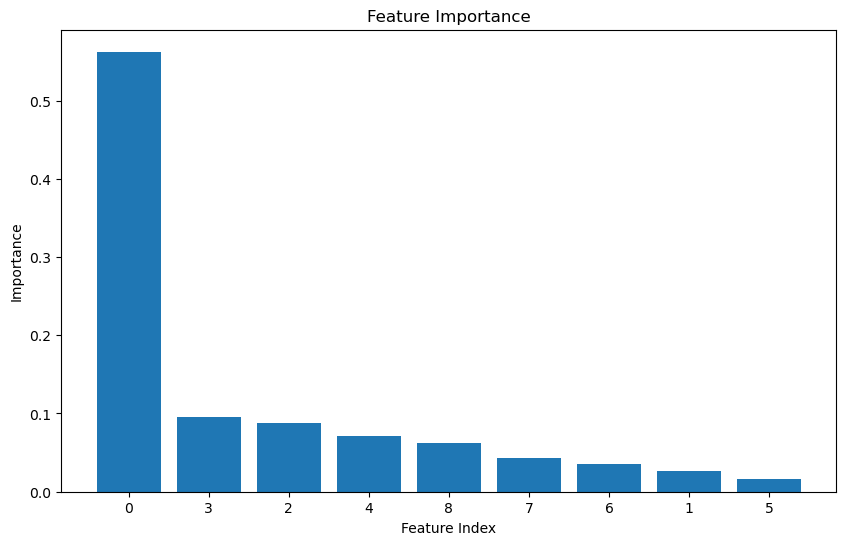

In [813]:
# Plot of the feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx])
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(range(len(feature_importance)), sorted_idx)
plt.show()